# Prototype V1

# Overview
- System
  - Two Classes:
    - Events of Interest
      - Following Gaussian Distribution
    - Evemnts of No Interest
      - Following Gaussian Distribution
  - Event Representation
    - A Single Value
- Estimator
  - A classifier to classify the events into two classes
- Planning
  - If yes, threshold stays the same
  - If no, threshold goes up
- Controller
  - If yes, threshold stays the same
  - If no, threshold goes up
  
# System
## Events Generation
ratio of events of interest: 0.05
ratio of events of no interest: 0.95
### Events of Interest
mean: xx std: xx

### Events of No Interest
mean: xx std: xx
note: take absolute value

## Triggering Mechanism
- above the threshold, trigger the event, log as 1
- below the threshold, do not trigger the event, log as 0

# Estimator
- assume it is 100% accurate, use the ground truth data

# Planning
- if the captured event is classified as 1, then the threshold stays the same
- if the captured event is classified as 0, then the threshold goes up

# Controller
- if the captured event is classified as 1, then the threshold stays the same
- if the captured event is classified as 0, then the threshold goes up

In [37]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

In [38]:
# Predefined Variables and Constants

# Global Variables
Num_Events = 10000
ratio_interest = 0.05
Num_Events_Interest = int(Num_Events * ratio_interest)
Num_Events_NoInterest = Num_Events - Num_Events_Interest
random_number = 0
random_seed = 2023
random.seed(random_seed)
event_value = 0
event_class = 0


# History Record
Events = np.zeros((Num_Events, 3)) # 3 columns: time, type, value
hist_threshold = np.zeros((Num_Events, 2)) # 2 columns: time, threshold value 

# I - System 
# Events of No Interest
mean_0 = 10
std_0 = 2

# Events of Interest
mean_1 = 30
std_1 = 2

# Triggering Mechanism
threshold = 0 # initial value
change_interval = (mean_1 - mean_0)/50

# II - Estimator

# III - Planner & Controller
up_factor = 1
down_factor = 1

In [39]:
# SATM Prototype
# no NN involved in this version

for i in range (0,Num_Events):
    if i%500 == 0:
        print("Simulation Progress %d/%d" %(i, Num_Events))
    Events[i,0] = i
    
    # generate events and log them
    random_number = random.random()
    if random_number <= ratio_interest:
        event_class = 1
        Events[i,1] = event_class
        event_value = random.gauss(mean_1, std_1)
        Events[i,2] = event_value
    else:
        event_class = 0
        Events[i,1] = event_class 
        event_value = random.gauss(mean_0, std_0)
        event_value = np.abs(event_value)
        Events[i,2] = event_value

    # update threshold and log the threshold
    if (event_class == 0) & (event_value >= threshold): # captured an event of no interest
        threshold = threshold + up_factor*change_interval
    elif (event_class == 1) & (event_value <= threshold): # missed an event of interest
        threshold = threshold - down_factor*change_interval
    elif (event_class == 1) & (event_value >= threshold):
        threshold = threshold
    elif (event_class == 0) & (event_value <= threshold):
        threshold = threshold
    hist_threshold[i,0] = i
    hist_threshold[i,1] = threshold
    

Simulation Progress 0/10000
Simulation Progress 500/10000
Simulation Progress 1000/10000
Simulation Progress 1500/10000
Simulation Progress 2000/10000
Simulation Progress 2500/10000
Simulation Progress 3000/10000
Simulation Progress 3500/10000
Simulation Progress 4000/10000
Simulation Progress 4500/10000
Simulation Progress 5000/10000
Simulation Progress 5500/10000
Simulation Progress 6000/10000
Simulation Progress 6500/10000
Simulation Progress 7000/10000
Simulation Progress 7500/10000
Simulation Progress 8000/10000
Simulation Progress 8500/10000
Simulation Progress 9000/10000
Simulation Progress 9500/10000


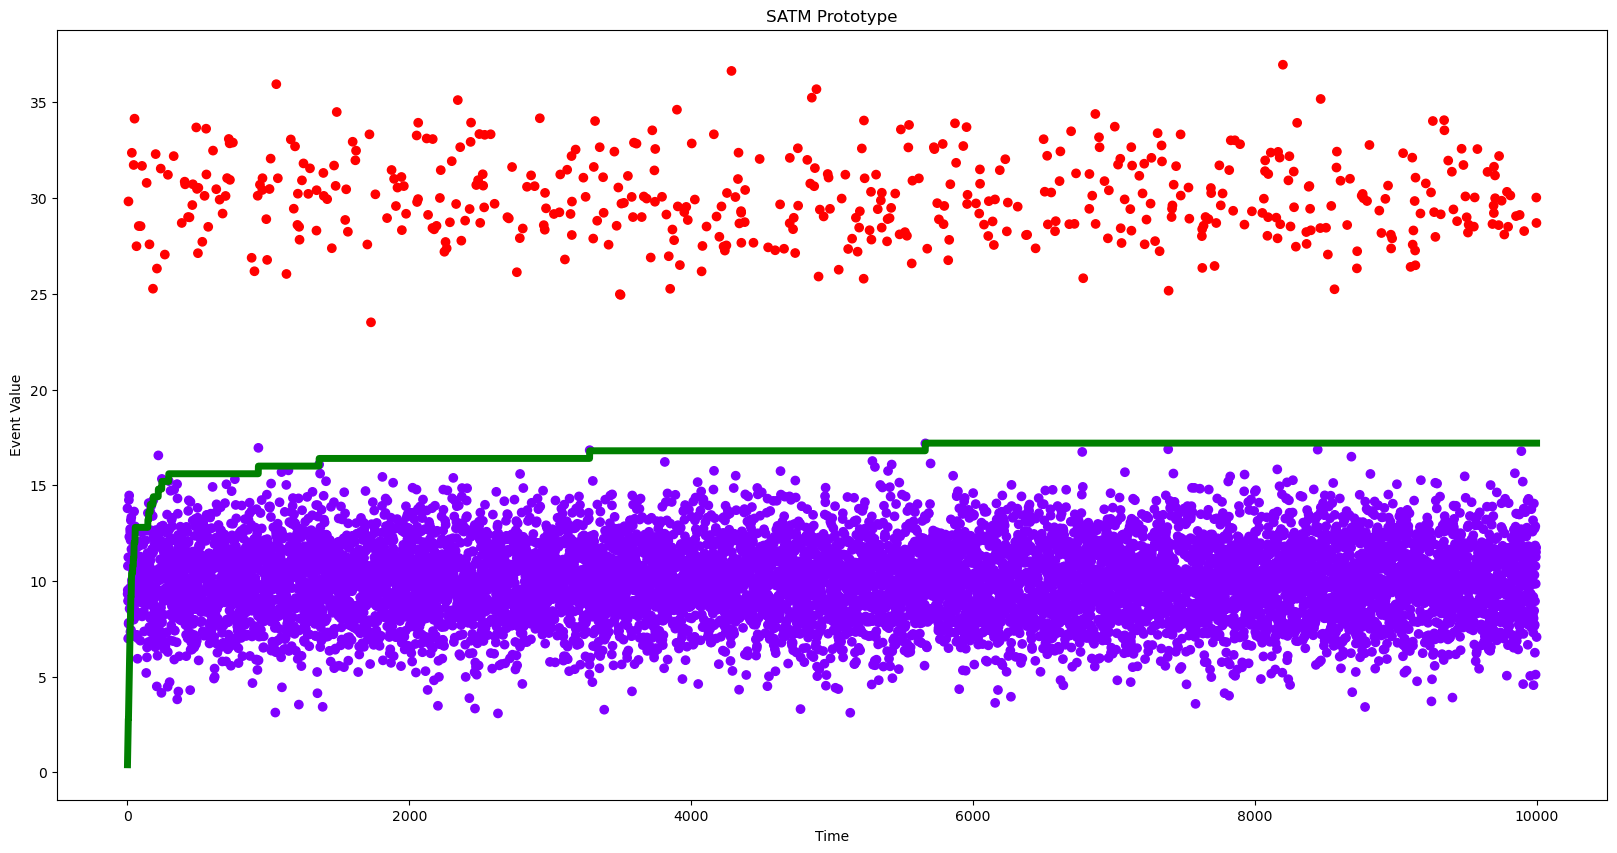

In [40]:
# plot results
plt.figure(figsize=(20,10))
plt.scatter(Events[:,0], Events[:,2], c=Events[:,1], cmap='rainbow')
plt.plot(hist_threshold[:,0], hist_threshold[:,1], color='green', linewidth=5)

# labels
plt.xlabel('Time')
plt.ylabel('Event Value')

# title
plt.title('SATM Prototype')

# save figure
plt.savefig('SATM_Prototype_V1.png')

# show figure
plt.show()